# Abstract

This project implements a simple SIR (susceptible-infective-recovered) model to simulate the spread of infectious disease. The SIR model is a mathematical model used to study the spread of infectious diseases within a population. The model divides the population into three groups: Susceptible (S), Infected (I), and Recovered (R). The Susceptible individuals are those who can become infected, the Infected individuals are those who are currently infected and can spread the disease to others, and the Recovered individuals are those who have recovered from the disease and will not be infected again. The report aims to implement the SIR model using Euler method to calculate the change of S, I, R through time, that can provide insights into how infectious diseases spread and how we can mitigate them

# Introduction

SIR models the change in number of Susceptible, Infectious and Recovered individuals through time. At time t = 0, we start with an initialized values for S, I, R in the populuation N. And as time proceeds, we model how S, I, R will change. 

2 events that can change the state of the system:
* a susceptiable individual get infected due to contact with infected individual
* a previously infected individual recovers and gets immunization

The change in S, I, R in the population will be dependent on 2 constants: 
* the infection rate (beta)
*  the recovery rate (gamma)
* $R_o = \frac{\beta}{\gamma} $: expected number of infections from a single infection 

Below we have system of equation that quantifies S, I, R at timestep t

# Implementation of SIR Model

To implement SIR model, we can solve below 3 differential equations:

$$\frac{dS}{dt} = - \frac{\beta SI}{N}$$

$$\frac{dI}{dt} = \frac{\beta SI}{N} - \gamma I$$

$$\frac{dR}{dt} = \gamma I$$



Where:
* S: Initial Susceptible population
* I: Initial Infected popultion
* R: Initial Recovered popultation
* $\beta$ : infection rate
* $\gamma$: recovery rate
* $T_r$: time to recover $T_r = y^{-1}$
* N: a constant of S(t) + I(t) + R(t)


## Euler Formula based on SIR model

Given the SIR model at timestep $t_{n-1}$, we have the Euler formula as below to solve for S, I, R at timestep $t_{n}$

$$s_n = s_{n-1} - \beta s_{n-1}i_{n-1}(t_{n} - t_{n-1}) $$
$$i_n = i_{n-1} + (\beta s_{n-1}i_{n-1} - \gamma i_{n-1})(t_{n} - t_{n-1}) $$
$$r_n = r_{n-1} + \gamma i_{n-1}(t_{n} - t_{n-1}) $$

where

* s (float): fraction of susceptible individuals 
    
* i (float): fraction of infected individuals
    
* r (float): fraction of recovered immuned individuals

* s + i + r = 1


[Euler Method](https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-eulers-method-for-systems)

In [236]:
import numpy as np
import matplotlib.pyplot as plt

In [237]:
def solve_euler( t_max, dt, S0, I0, R0, beta, gamma ):
  """ solve for S, I, R from t_min to t_max
  Args:
    t_max(int): end timestep
    S0 (int): initial susceptible individuals
    I0 (int): initial infected individuals
    R0 (int): initial recovered immuned individuals
    beta (float): 

  Returns: 
    numpy array of [S, I, R] values for each timestep
  """
  # Initialize the arrays to store the values of the variables over time
  S = np.zeros(t_max+1)
  I = np.zeros(t_max+1)
  R = np.zeros(t_max+1)

  # Set the initial values of the arrays
  S[0] = S0
  I[0] = I0
  R[0] = R0

  # Implement the Euler method to update the variables over time
  for t in range(0, t_max, dt):
      S[t+1] = S[t] - beta*S[t]*I[t]*dt
      I[t+1] = I[t] + (beta*S[t]*I[t] - gamma*I[t])*dt
      R[t+1] = R[t] + gamma*I[t]*dt

  res = np.vstack((S, I, R))
  return res

def plot_sir(res):
  plt.plot(res[0], label='Susceptible')
  plt.plot(res[1], label='Infected')
  plt.plot(res[2], label='Recovered')
  plt.xlabel('Time')
  plt.ylabel('Population')
  plt.legend()
  plt.show()

## Verify

**Test 1**: Verify the above implementation using data from [A Simple Example of a Mathematical Model: The Spread of an Infectious Disease paper by Torkel Loman](https://www.pathsense.eu/simple-example-mathematical-model-spread-infectious-disease/), where we start with a population of 1000 individuals, and 1 infected, with infection rate of 0.0005 and recover rate of 0.05

Reproduction: 0.01
****
S, I, R on the last day: 
S = 0.01289431896407537, I = 1.1820982890487355, R = 999.8050073919877
***
Peak infections reached on day 23 at 701.5648909198146


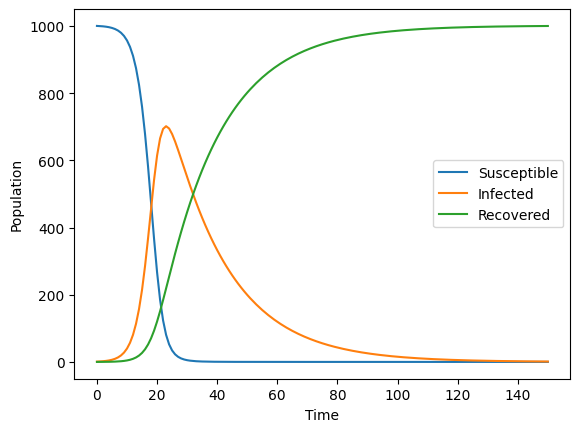

In [238]:
# Test 1
s0 = 1000
i0 = 1
beta = 0.0005
gamma = 0.05
res = solve_euler(t_max = 150, dt = 1, S0 = s0, I0 = i0, R0 = 0, beta = beta, gamma = gamma )

S, I, R = res[0], res[1], res[2]
Re = beta/gamma
print('Reproduction:', Re)
print("****")
print(f"S, I, R on the last day: \nS = {S[-1]}, I = {I[-1]}, R = {R[-1]}")
print("***")
print(f"Peak infections reached on day {np.argmax(I)} at {max(I)}" )
plot_sir(res)

**Test 2**: Verify the implementation with Hong Kong flu in New York city in late 1960 from [Mathematical Association of America](https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-background-hong-kong-flu). Here we assume the population of susceptible people were 7.9 millions, and 10 patient 0 at the start of the epidemic. We also assumed the patients will stop being infectious in 3 days (gamma = 1/3), and each infected can spread the disease every 2 days (beta = 1/2). The peak infection will reach at 6% of the population on day 80

Reproduction: 1.5
****
S, I, R on the last day: 
S = 0.4064954014256719, I = 1.3146566906282455e-05, R = 0.5934927220074221
***
Peak infections reached on day 80 at 0.06595900892523056


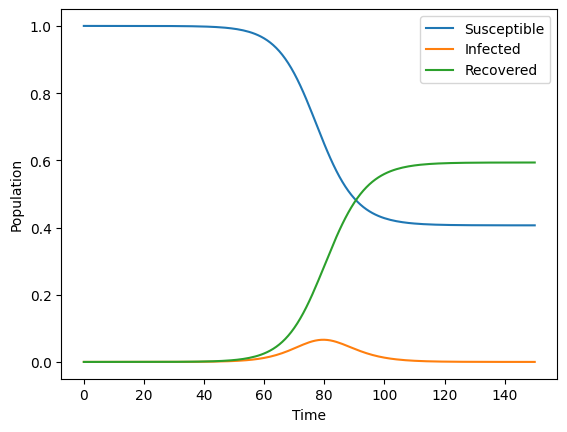

In [239]:
# Test 2
s0 = 1
i0 = 1.27*(10**-6)
beta = 1/2
gamma = 1/3
res = solve_euler(t_max = 150, dt = 1, S0 = s0, I0 = i0, R0 = 0, beta = beta, gamma = gamma )

S, I, R = res[0], res[1], res[2]
Re = beta/gamma
print('Reproduction:', Re)
print("****")
print(f"S, I, R on the last day: \nS = {S[-1]}, I = {I[-1]}, R = {R[-1]}")
print("***")
print(f"Peak infections reached on day {np.argmax(I)} at {max(I)}" )

plot_sir(res)


**Test 3**: We can verify the model based on the data from [A SIR model assumption for the spread of COVID-19](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7321055/) by estimating the progress of Covid in China from Jan 2020 to Aug 2020. About 17 day after the first infection, we had around 74% of the population got infected.

Reproduction: 9.999999999999998
****
S, I, R on the last day: 
S = 1.101250053395258e-05, I = 0.001236058045802213, R = 1.0487529294536628
***
Peak infections reached on day 17 at 0.7427841001459494


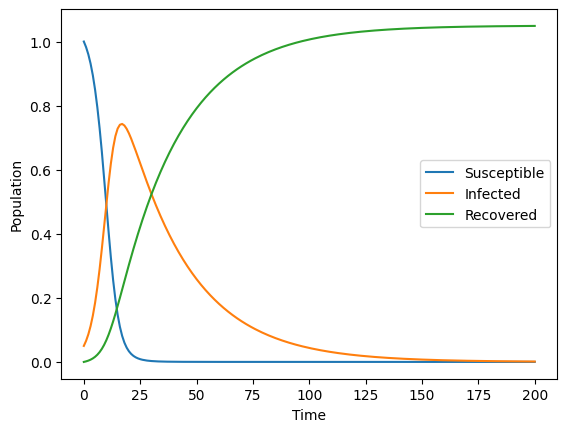

In [240]:
# Test 3: Covid in China
s0 = 1
i0 = 0.05
beta = 0.350
gamma = 0.035
res = solve_euler(t_max = 200, dt = 1, S0 = s0, I0 = i0, R0 = 0, beta = beta, gamma = gamma )

S, I, R = res[0], res[1], res[2]
Re = beta/gamma
print('Reproduction:', Re)
print("****")
print(f"S, I, R on the last day: \nS = {S[-1]}, I = {I[-1]}, R = {R[-1]}")
print("***")
print(f"Peak infections reached on day {np.argmax(I)} at {max(I)}" )

plot_sir(res)

Reproduction: 11.428571428571429
****
S, I, R on the last day: 
S = 1.7222962052175228e-06, I = 0.0011749761217903652, R = 1.048823301582004
***
Peak infections reached on day 15 at 0.7752278330795686


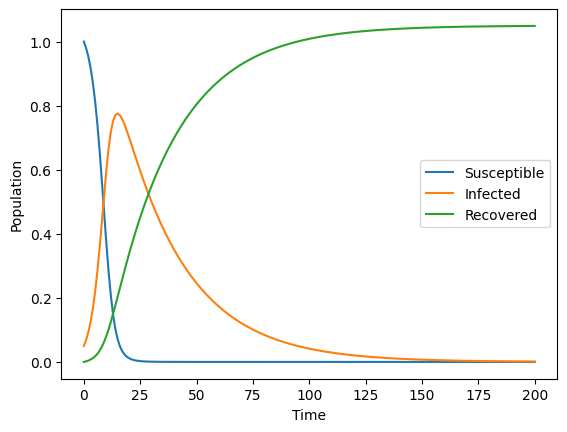

In [241]:
# Test 4: Covid in South Korea
s0 = 1
i0 = 0.05
beta = 0.4
gamma = 0.035
res = solve_euler(t_max = 200, dt = 1, S0 = s0, I0 = i0, R0 = 0, beta = beta, gamma = gamma )

S, I, R = res[0], res[1], res[2]
Re = beta/gamma
print('Reproduction:', Re)
print("****")
print(f"S, I, R on the last day: \nS = {S[-1]}, I = {I[-1]}, R = {R[-1]}")
print("***")
print(f"Peak infections reached on day {np.argmax(I)} at {max(I)}" )

plot_sir(res)

## Flatten the curve with Reproduction Rate

From the above tests, we can see that the higher the reproduction rate, the faster the higher the infected numbers gonna be. Based on the examples 3 and 4, we can see the peak infections increase with reproduction rate given the same initial infected (I0)

|# | reproduction rate| peak infections | day|
|-|-|-|-|
|3|10|74%|17th|
|4|11.4|77%|15th|

Next, we will use this knowledge to similate the infections based on parameters such as reproduction rate (Re)

In [242]:
def flatten(thresholds, t_max, dt, S0, I0, R0, B, bstep, gamma=0.035):
    """ simulates the change of Infections based on Reproduction Rate, 
    assuming we only change Infection Rate (Beta), and keep gamma at 0.035.
    Track at which level of reproduction rate, the infection threshold is crossed
    """
    Betas = np.arange(0.1, B, bstep)
    trackers = []
    Btracker = [0]*len(thresholds)
    Rtracker = [0]*len(thresholds)
    for i, threshold in enumerate(thresholds):
      # at each threshold, what Re will cause peak infection to pass threshold
      for beta in Betas:
          Re = beta/gamma
          res = solve_euler(t_max, dt, S0, I0, R0, beta, gamma)
          # peak infection passed threshold
          if max(res[1]) > threshold:
            Btracker[i] = round(beta, 2)
            Rtracker[i] = round(Re, 2)
            break

    trackers.append(thresholds)
    trackers.append(Btracker)
    trackers.append(Rtracker)
    return trackers
        
def plot_threshold(trackers):
  plt.bar(trackers[2], trackers[0], edgecolor = "black", color="white")
  
  # Labeling the chart
  plt.title('Reproduction vs Threshold')
  plt.xlabel('Reproduction Values')
  plt.ylabel('Threshold Values')
  
  # Displaying the chart
  plt.show()


[[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
 [0.1, 0.11, 0.14, 0.18, 0.25, 0.36, 0.57],
 [2.86, 3.14, 4.0, 5.14, 7.14, 10.29, 16.29]]


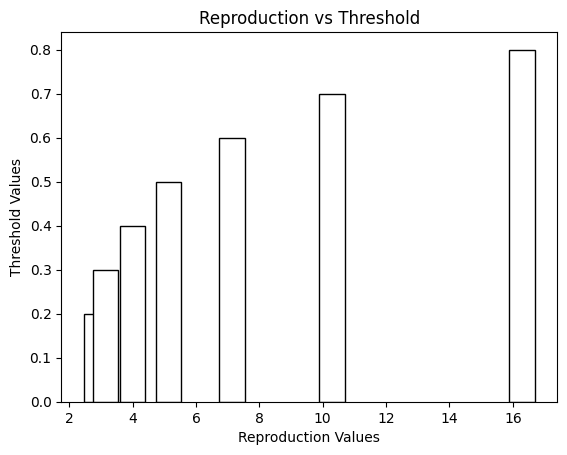

In [243]:
import pprint
s0 = 1
i0 = 0.004
B = 1.0
bstep = 0.01
gamma = 0.035
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
trackers = flatten(thresholds, t_max = 200, dt = 1, S0 = s0, I0 = i0, R0 = 0, B = B, bstep = bstep, gamma = gamma )
pprint.pprint(trackers)
plot_threshold(trackers)

Based on above plot, we can see that at Reproduction rate of 2.86 (beta of 0.1), infection will peak at 20% of population. At reproduction rate of 16 (beta of 0.57), infection will peak at 80% of the poplation. Therefore, if all else is equal, it's important to control the infection rate by applying measures such as social distancing

# Summary
The SIR model is a widely used mathematical model in epidemiology to understand and predict the spread of infectious diseases. In this report, the SIR model was implemented using the Euler method to simulate the spread of a disease in a population. With the Euler method, we can estimate number of susceptibles, infecteds and recovereds iteratively at each timestep using the initial values of the infected numbers, the infection rate, recovery rate, and initial number of infected individuals. By changing these initial parameters, we can simulate the spread of the disease to predict and understand the epidemic. The model is highly dependent on the reproduction rate (infection_rate/recovery_rate), the higher the reproduction rate, the faster the epidemic will reach it peak, the more overwhelmed the health system will be. Therefore, this model is helpful to estimate the good reproduction rate, either by reducing the infection rate or by improving the recovery rate, to keep the epidemic in check. 
